### How can I replace the 0 values in df_2014 with 1 or the ```df_holiday['Holday']``` value for the index matching the holiday's date?

In [343]:
import numpy as np
import pandas as pd 
import seaborn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

**Grab data from master NYC file, sort and group to show complaint amount by type for each day**

In [344]:
cols = ['Created_Date', 'Complaint_Type']
df = pd.read_csv('NYC.csv', parse_dates=['Created_Date'], usecols=cols, index_col='Created_Date')
df = pd.get_dummies(df.Complaint_Type)
df = df.reset_index()
df = df.groupby(df['Created_Date']).sum()
df.reset_index().head()
df = df.sort_index()

**Read in weather data for the years being analyzed and index by date**

In [445]:
keepers = ['EST', 'Max TemperatureF', 'Events']
df_weather_2014 = pd.read_csv('clean_2014_weather.csv', usecols=keepers, parse_dates='EST')
df_weather_2015 = pd.read_csv('clean_2015_weather.csv', usecols=keepers, parse_dates='EST')
df_weather_2016 = pd.read_csv('nyc_2016_weather.csv', parse_dates='Created_Date')
df_weather_2014 = df_weather_2014.set_index('EST')
df_weather_2015 = df_weather_2015.set_index('EST')

In [446]:
df_weather_2016['Created_Date'] = pd.to_datetime(df_weather_2016['Created_Date'])
df_weather_2016 = df_weather_2016.set_index('Created_Date')

In [447]:
df_weather_2016.head()

,Max TempF
Created_Date,
2016-01-01,42°
2016-01-02,40°
2016-01-03,45°
2016-01-04,36°
2016-01-05,29°


In [448]:
df_weather_2015.head()

,Max TemperatureF,Events
EST,,
2015-1-1,40,Sunny
2015-1-2,45,Sunny
2015-1-3,47,Rain
2015-1-4,55,Fog-Rain
2015-1-5,51,Sunny


**Join the weather event to the year's dataframe, initialize 'Holiday' column with 0 vals**

In [457]:
year_array = np.arange('2016-01', '2017-01', dtype='datetime64[D]')

In [450]:
df_2016 = pd.DataFrame(arr)

In [451]:
df_2016['Created_Date'] = df_2016

In [418]:
df_2014 = df[:365].join(df_weather_2014)
df_2015 = df[365:].join(df_weather_2015)
df_2016 = df_2016.join(df_weather_2016)
df_2014['Holiday'] = 0
df_2015['Holiday'] = 0
df_2016['Holiday'] = 0

In [420]:
df_2014.head()

,Building Conditions,General Request or Complaint,Living Conditions,Parking Enforcement,Signal/Sign Repair,Street/Sidewalk Maintenance,Max TemperatureF,Events,Holiday
Created_Date,,,,,,,,,
2014-01-01,1512,388,155,336,139,303,34,Sunny,0
2014-01-02,3236,921,263,360,315,320,33,Snow,0
2014-01-03,3712,624,235,306,240,516,19,Fog-Snow,0
2014-01-04,4347,489,154,375,130,1188,31,Sunny,0
2014-01-05,2529,500,169,361,206,1022,49,Fog-Rain,0


**Rename columns to better fit my screen**

In [347]:
df_2014.columns = ['Building Conditions', 'General Request', 'Living Conditions', 'Parking Enforcement', 'Signal/Sign Repair', 'Street/Sidewalk Repair', 'Max TempF', 'Weather', 'Holiday']
df_2015.columns = ['Building Conditions', 'General Request', 'Living Conditions', 'Parking Enforcement', 'Signal/Sign Repair', 'Street/Sidewalk Repair', 'Max TempF', 'Weather', 'Holiday']

**Read in holiday csv, contains holidays and dates for each year**

In [348]:
df_holidays = pd.read_csv('../../../holidays.csv', parse_dates=['2014_date', '2015_date'])

In [349]:
df_holidays2 = df_holidays.set_index('2014_date')
df_holidays3 = df_holidays.set_index('2015_date')

In [350]:
df_2014.join(df_holidays2, lsuffix='_')
df_2015.join(df_holidays3, lsuffix='_')

,Building Conditions,General Request,Living Conditions,Parking Enforcement,Signal/Sign Repair,Street/Sidewalk Repair,Max TempF,Weather,Holiday_,Holiday,2014_date
Created_Date,,,,,,,,,,,
2015-01-01,1607,369,273,438,112,264,40,Sunny,0,New Year's Day,2014-01-01
2015-01-02,1935,604,581,588,282,499,45,Sunny,0,NaN,NaT
2015-01-03,1527,465,369,511,156,322,47,Rain,0,NaN,NaT
2015-01-04,1230,395,403,486,165,357,55,Fog-Rain,0,NaN,NaT
2015-01-05,2797,748,705,625,537,734,51,Sunny,0,NaN,NaT
2015-01-06,3702,729,552,570,621,662,23,Snow,0,NaN,NaT
2015-01-07,5375,773,637,505,315,709,25,Sunny,0,NaN,NaT
2015-01-08,7137,723,671,558,682,770,22,Sunny,0,NaN,NaT
2015-01-09,4384,594,564,575,613,452,34,Snow,0,NaN,NaT


In [351]:
df_2014_final = df_2014.join(df_holidays2, lsuffix='_')
df_2015_final = df_2015.join(df_holidays3, lsuffix='_')

In [352]:
df_2014_final = df_2014_final.drop('Holiday_', axis=1).fillna(0)
df_2014_final = df_2014_final.drop('2015_date', axis=1).fillna(0)
df_2015_final = df_2015_final.drop('Holiday_', axis=1).fillna(0)
df_2015_final = df_2015_final.drop('2014_date', axis=1).fillna(0)

In [353]:
df_2014_final['Holiday'] = (df_2014_final['Holiday'] != 0).astype(int)
df_2015_final['Holiday'] = (df_2015_final['Holiday'] != 0).astype(int)

In [354]:
encode = preprocessing.LabelEncoder()

In [355]:
encode.fit(df_2014_final['Max TempF'])

LabelEncoder()

In [356]:
df_2014_final['Max TempF'] = encode.transform(df_2014_final['Max TempF'])

In [357]:
encode.fit(df_2015_final['Max TempF'])

LabelEncoder()

In [358]:
df_2015_final['Max TempF'] = encode.transform(df_2015_final['Max TempF'])

In [372]:
X_2014 = df_2014_final.reset_index(drop=True)
y_2014 = df_2014_final['Max TempF']
X_2015 = df_2015_final.reset_index(drop=True)
y_2015 = df_2015_final['Max TempF']

In [373]:
X_train = X_2014
X_test = X_2015

In [374]:
y_train = y_2014.values
y_test = y_2015.values

In [375]:
lr = LinearRegression()

In [376]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [377]:
print('Coefficients: \n', lr.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((lr.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % lr.score(X_test, y_test))

('Coefficients: \n', array([ -5.60762281e-19,   1.12189514e-18,  -2.08581863e-19,
        -6.08180244e-18,   2.23754341e-18,  -4.31404468e-19,
        -2.45343093e-17,   1.00000000e+00,  -8.56953397e-16]))
Residual sum of squares: 0.00
Variance score: 1.00


In [378]:
print len(X_test)
print len(y_test)

365
365


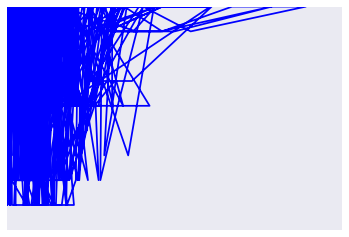

In [379]:
plt.plot(X_test, lr.predict(X_test), color='blue')
plt.xticks(())
plt.yticks(())

plt.show()